# **Computer Assignment2 Main Question**
## **Course** : Deep Learning Course
## **Department of Electrical Engineering At Sharif University of Technology**
### **Author**: M.Sina Hasan-Nia 
### **ID Number**: 96108515

# Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, losses
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.preprocessing.image import ImageDataGenerator

# load dataset

Dataset Information : This dataset consists of 60,000 images which can be catogorized in 10 classes.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
"""idx = np.random.permutation(train_images1.shape[0])
train_idx = idx[0:39999]
valid_idx = idx[40000:]
train_images = train_images1[train_idx,:,:,:]
train_labels=train_labels1[train_idx]
valid_images=train_images1[valid_idx,:,:,:]
valid_labels=train_labels1[valid_idx]"""
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
print("train Images type : ",type(train_images),"Train Images shape : " , train_images.shape)
print("train_labels type : " , type(train_labels),"Train labels shape : " , train_labels.shape)
print("test images type : " , type(test_images),"test images shape : " , test_images.shape)
print("test labels type : " , type(test_labels),"test labels shape : " , test_labels.shape)

train Images type :  <class 'numpy.ndarray'> Train Images shape :  (50000, 32, 32, 3)
train_labels type :  <class 'numpy.ndarray'> Train labels shape :  (50000, 1)
test images type :  <class 'numpy.ndarray'> test images shape :  (10000, 32, 32, 3)
test labels type :  <class 'numpy.ndarray'> test labels shape :  (10000, 1)


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# show 10 images

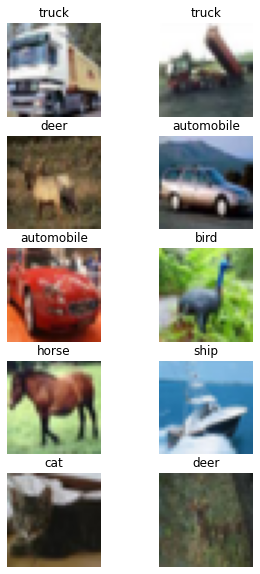

In [ ]:
row = 5
col = 2
fig = plt.figure(figsize=(5, 10))
for index in range(1, row * col + 1):
    fig.add_subplot(row, col, index)
    # showing image
    plt.imshow(train_images[index])
    plt.axis('off')
    plt.title(class_names[train_labels[index][0]])

# basic model (first step)

In [ ]:
model = keras.Sequential([                       
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(1024, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 128)               131200    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,279,242
Trainable params: 3,279,242
Non-trainable params: 0
_________________________________________________________________


# first test using batch 32

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history32 = model.fit(train_images, train_labels, batch_size=32, epochs=70, validation_data=(test_images, test_labels))

Epoch 1/70
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0473 - accuracy: 0.2749 - val_loss: 1.9254 - val_accuracy: 0.3220
Epoch 2/70
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8752 - accuracy: 0.3477 - val_loss: 1.8398 - val_accuracy: 0.3547
Epoch 3/70
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8066 - accuracy: 0.3721 - val_loss: 1.7869 - val_accuracy: 0.3799
Epoch 4/70
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7620 - accuracy: 0.3881 - val_loss: 1.7433 - val_accuracy: 0.3985
Epoch 5/70
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7282 - accuracy: 0.3992 - val_loss: 1.7238 - val_accuracy: 0.4021
Epoch 6/70
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7008 - accuracy: 0.4095 - val_loss: 1.7002 - val_accuracy: 0.4086
Epoch 7/70
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6777 - accuracy: 0.4175 - val_loss: 1.6750 - val_accuracy

In [ ]:
#evaluate the model
# list all data in history
print(history32.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


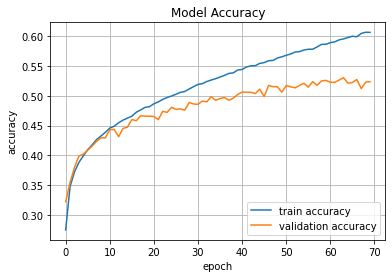

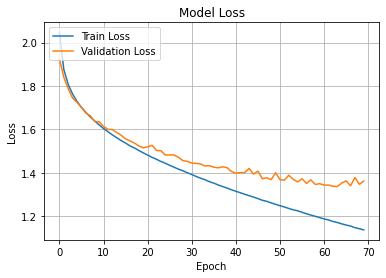

In [ ]:
plt.figure()
plt.plot(history32.history['accuracy'], label='train accuracy')
plt.plot(history32.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.grid()
plt.show()
##################################################
plt.figure()
plt.plot(history32.history['loss'] , label="Train Loss")
plt.plot(history32.history['val_loss'] , label = "Validation Loss")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 1.3613 - accuracy: 0.5235


##  predict a random image

bird


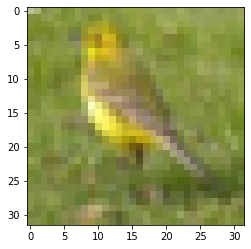

In [ ]:
random_index = random.randint(0, len(test_images) - 1)
output = model.predict(np.array([test_images[random_index]]))
print(class_names[np.argmax(output)])
plt.imshow(test_images[random_index])

## make confusion matrix

tf.Tensor(
[[470  15  35  11  26   5   3  12  76  15]
 [ 33 663  17  21  11  10  11  18  80 164]
 [ 88   8 357  52 128  50  51  32  19  10]
 [ 19  12  54 249  33 121  38  30  17  24]
 [ 31   7 102  32 364  44  63  40  29   7]
 [ 57  21 147 299  86 523  73  92  49  25]
 [ 40  23 150 182 178 100 700  35  24  29]
 [ 88  37 113 104 153 116  41 708  42  93]
 [111  34   9  13  11  11  11   5 598  30]
 [ 63 180  16  37  10  20   9  28  66 603]], shape=(10, 10), dtype=int32)


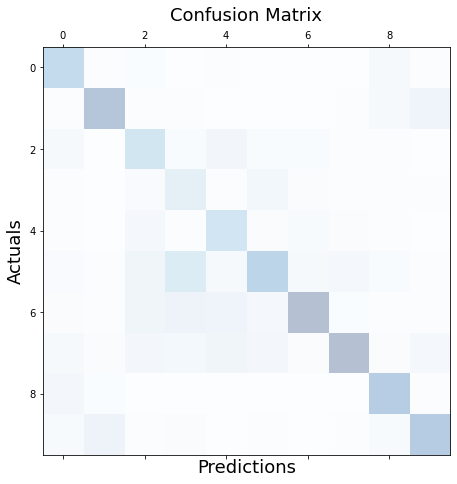

In [ ]:
predictions = model.predict(test_images)
all_predictions = np.array([])
for i in range(len(test_images)):
  prediction = np.array([np.argmax(predictions[i])])
  all_predictions = np.concatenate([all_predictions, prediction])
conf_mat = tf.math.confusion_matrix(all_predictions, test_labels)
print(conf_mat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# second test using batch 64

In [ ]:
history64 = model.fit(train_images, train_labels, batch_size=64, epochs=70, validation_data=(test_images, test_labels))

Epoch 1/70
782/782 [==============================] - 8s 10ms/step - loss: 1.1153 - accuracy: 0.6151 - val_loss: 1.3351 - val_accuracy: 0.5286
Epoch 2/70
782/782 [==============================] - 8s 10ms/step - loss: 1.1117 - accuracy: 0.6175 - val_loss: 1.3284 - val_accuracy: 0.5240
Epoch 3/70
782/782 [==============================] - 5s 7ms/step - loss: 1.1084 - accuracy: 0.6181 - val_loss: 1.3256 - val_accuracy: 0.5358
Epoch 4/70
782/782 [==============================] - 4s 6ms/step - loss: 1.1052 - accuracy: 0.6206 - val_loss: 1.3290 - val_accuracy: 0.5314
Epoch 5/70
782/782 [==============================] - 5s 6ms/step - loss: 1.1032 - accuracy: 0.6205 - val_loss: 1.3177 - val_accuracy: 0.5384
Epoch 6/70
782/782 [==============================] - 4s 6ms/step - loss: 1.0998 - accuracy: 0.6237 - val_loss: 1.3250 - val_accuracy: 0.5343
Epoch 7/70
782/782 [==============================] - 5s 6ms/step - loss: 1.0976 - accuracy: 0.6222 - val_loss: 1.3192 - val_accuracy: 0.5372
Epoc

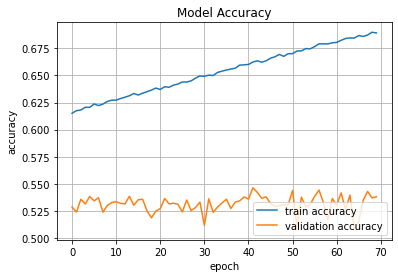

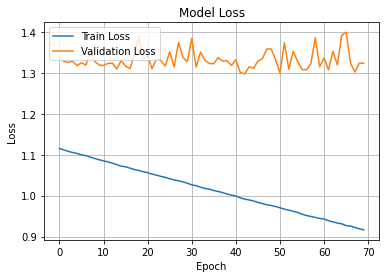

In [ ]:
plt.figure()
plt.plot(history64.history['accuracy'], label='train accuracy')
plt.plot(history64.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.grid()
plt.show()
##################################################
plt.figure()
plt.plot(history64.history['loss'] , label="Train Loss")
plt.plot(history64.history['val_loss'] , label = "Validation Loss")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 1.3237 - accuracy: 0.5381


dog


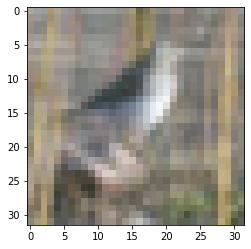

In [ ]:
random_index = random.randint(0, len(test_images) - 1)
output = model.predict(np.array([test_images[random_index]]))
print(class_names[np.argmax(output)])
plt.imshow(test_images[random_index])

tf.Tensor(
[[585  47  52  19  33  11   6  25 101  31]
 [ 24 581  10   9   4   4   7  11  56 119]
 [ 79  15 410  64 145  58  71  55  23  16]
 [ 39  40 107 384  69 197 106  76  38  66]
 [ 28   7 104  43 433  59  79  57  22   7]
 [ 35  26 138 286  91 531  89 114  36  31]
 [ 21  20  93  93 105  48 602  13   9  21]
 [ 32  27  67  62  94  64  17 617  16  63]
 [114  68  10  20  20  13  12  12 654  62]
 [ 43 169   9  20   6  15  11  20  45 584]], shape=(10, 10), dtype=int32)


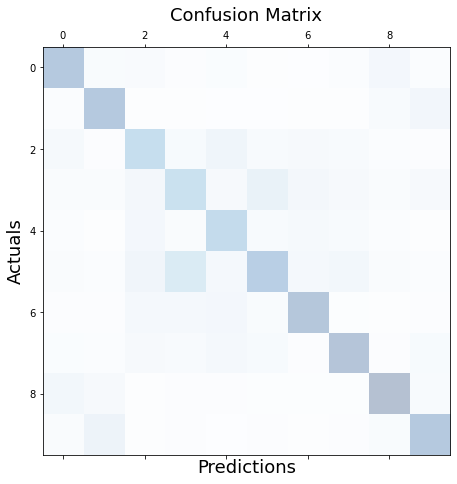

In [ ]:
predictions = model.predict(test_images)
all_predictions = np.array([])
for i in range(len(test_images)):
  prediction = np.array([np.argmax(predictions[i])])
  all_predictions = np.concatenate([all_predictions, prediction])
conf_mat = tf.math.confusion_matrix(all_predictions, test_labels)
print(conf_mat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# third test using batch 256

In [ ]:
history256 = model.fit(train_images, train_labels, batch_size=256, epochs=70, validation_data=(test_images, test_labels))

Epoch 1/70
196/196 [==============================] - 2s 10ms/step - loss: 0.8932 - accuracy: 0.7031 - val_loss: 1.2932 - val_accuracy: 0.5479
Epoch 2/70
196/196 [==============================] - 2s 9ms/step - loss: 0.8904 - accuracy: 0.7044 - val_loss: 1.2951 - val_accuracy: 0.5423
Epoch 3/70
196/196 [==============================] - 2s 9ms/step - loss: 0.8890 - accuracy: 0.7042 - val_loss: 1.2850 - val_accuracy: 0.5489
Epoch 4/70
196/196 [==============================] - 2s 9ms/step - loss: 0.8891 - accuracy: 0.7045 - val_loss: 1.3098 - val_accuracy: 0.5442
Epoch 5/70
196/196 [==============================] - 2s 9ms/step - loss: 0.8880 - accuracy: 0.7051 - val_loss: 1.2897 - val_accuracy: 0.5454
Epoch 6/70
196/196 [==============================] - 2s 9ms/step - loss: 0.8873 - accuracy: 0.7060 - val_loss: 1.2889 - val_accuracy: 0.5482
Epoch 7/70
196/196 [==============================] - 2s 9ms/step - loss: 0.8861 - accuracy: 0.7053 - val_loss: 1.2870 - val_accuracy: 0.5479
Epoch

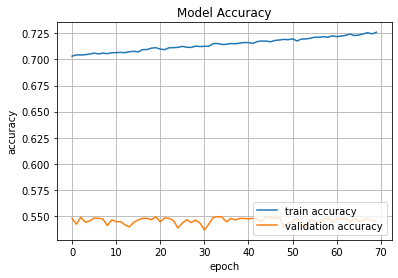

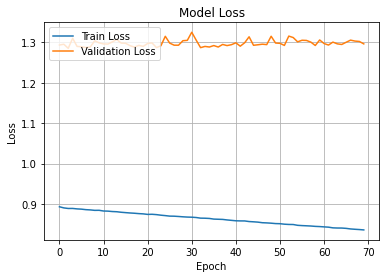

In [ ]:
plt.figure()
plt.plot(history256.history['accuracy'], label='train accuracy')
plt.plot(history256.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.grid()
plt.show()
##################################################
plt.figure()
plt.plot(history256.history['loss'] , label="Train Loss")
plt.plot(history256.history['val_loss'] , label = "Validation Loss")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 1.2959 - accuracy: 0.5446


deer


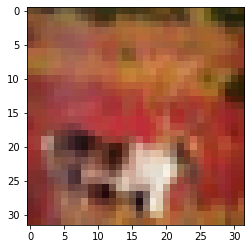

In [ ]:
random_index = random.randint(0, len(test_images) - 1)
output = model.predict(np.array([test_images[random_index]]))
print(class_names[np.argmax(output)])
plt.imshow(test_images[random_index])

tf.Tensor(
[[603  38  63  24  37  17   8  31  98  36]
 [ 30 656  15  14   6   5  11  12  65 172]
 [ 55  12 382  62 107  53  68  41  21  10]
 [ 25  21  82 327  52 179  76  55  24  42]
 [ 55  10 174  79 524  83 118  94  31  15]
 [ 23  18 118 271  67 500  67  98  30  22]
 [ 19  22  86 107  86  57 607  16   5  20]
 [ 25  23  60  66  84  71  18 619  13  59]
 [122  58  13  23  24  15  17  11 662  58]
 [ 43 142   7  27  13  20  10  23  51 566]], shape=(10, 10), dtype=int32)


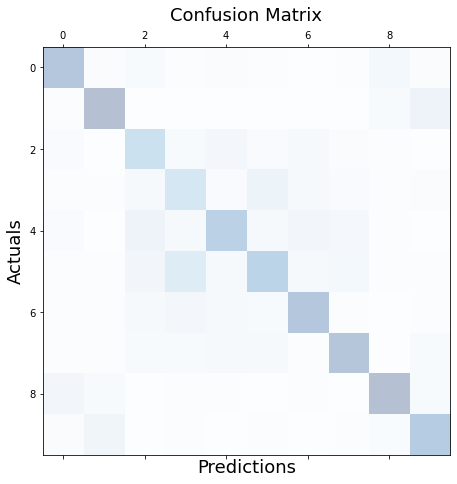

In [ ]:
predictions = model.predict(test_images)
all_predictions = np.array([])
for i in range(len(test_images)):
  prediction = np.array([np.argmax(predictions[i])])
  all_predictions = np.concatenate([all_predictions, prediction])
conf_mat = tf.math.confusion_matrix(all_predictions, test_labels)
print(conf_mat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## comparing the models with Different batch sizes performance

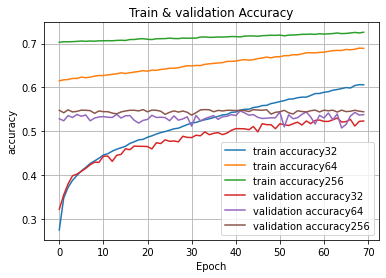

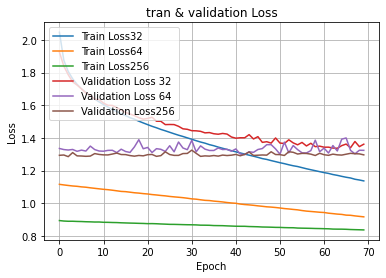

In [ ]:
# train_acc
plt.figure()
plt.plot(history32.history['accuracy'], label='train accuracy32')
plt.plot(history64.history['accuracy'], label='train accuracy64')
plt.plot(history256.history['accuracy'], label='train accuracy256')
# val acc
plt.plot(history32.history['val_accuracy'], label='validation accuracy32')
plt.plot(history64.history['val_accuracy'], label='validation accuracy64')
plt.plot(history256.history['val_accuracy'], label='validation accuracy256')
plt.title('Train & validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid()
plt.show()
# train loss
plt.figure()
plt.plot(history32.history['loss'] , label="Train Loss32")
plt.plot(history64.history['loss'] , label="Train Loss64")
plt.plot(history256.history['loss'] , label="Train Loss256")
# val loss
plt.plot(history32.history['val_loss'] , label = "Validation Loss 32")
plt.plot(history64.history['val_loss'] , label = "Validation Loss 64")
plt.plot(history256.history['val_loss'] , label = "Validation Loss256")
plt.title('tran & validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# using tanh in hidden layers

In [ ]:
model = keras.Sequential([                          
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(1024, activation='tanh'),
    layers.Dense(128, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 128)               131200    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,279,242
Trainable params: 3,279,242
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_tanh = model.fit(train_images, train_labels, batch_size=256, epochs=70, validation_data=(test_images, test_labels))

Epoch 1/70
196/196 [==============================] - 4s 12ms/step - loss: 2.2379 - accuracy: 0.1801 - val_loss: 2.1482 - val_accuracy: 0.2429
Epoch 2/70
196/196 [==============================] - 2s 9ms/step - loss: 2.1025 - accuracy: 0.2568 - val_loss: 2.0603 - val_accuracy: 0.2788
Epoch 3/70
196/196 [==============================] - 2s 9ms/step - loss: 2.0336 - accuracy: 0.2854 - val_loss: 2.0058 - val_accuracy: 0.2995
Epoch 4/70
196/196 [==============================] - 2s 9ms/step - loss: 1.9871 - accuracy: 0.3049 - val_loss: 1.9666 - val_accuracy: 0.3153
Epoch 5/70
196/196 [==============================] - 2s 9ms/step - loss: 1.9517 - accuracy: 0.3176 - val_loss: 1.9353 - val_accuracy: 0.3271
Epoch 6/70
196/196 [==============================] - 2s 9ms/step - loss: 1.9244 - accuracy: 0.3287 - val_loss: 1.9118 - val_accuracy: 0.3382
Epoch 7/70
196/196 [==============================] - 2s 9ms/step - loss: 1.9026 - accuracy: 0.3372 - val_loss: 1.8926 - val_accuracy: 0.3461
Epoch

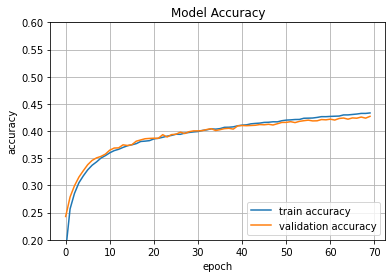

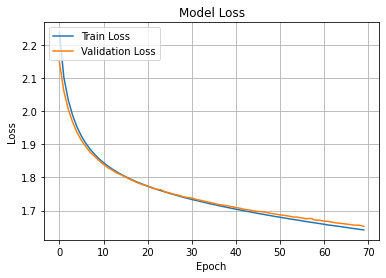

In [ ]:
plt.figure()
plt.plot(history_tanh.history['accuracy'], label='train accuracy')
plt.plot(history_tanh.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim([0.2, 0.6])
plt.legend(loc='lower right')
plt.grid()
plt.show()
##################################################
plt.figure()
plt.plot(history_tanh.history['loss'] , label="Train Loss")
plt.plot(history_tanh.history['val_loss'] , label = "Validation Loss")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.6528 - accuracy: 0.4271


automobile


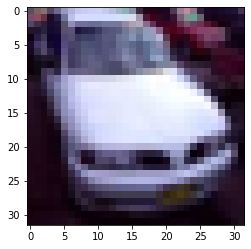

In [ ]:
random_index = random.randint(0, len(test_images) - 1)
output = model.predict(np.array([test_images[random_index]]))
print(class_names[np.argmax(output)])
plt.imshow(test_images[random_index])

tf.Tensor(
[[537  63 125  56  74  47  14  59 150  71]
 [ 42 510  40  55  26  34  43  47  69 172]
 [ 43  17 264  65 118  77  77  42  12  10]
 [ 26  32  80 273  58 167 107  67  29  30]
 [ 10  20 137  53 337  72  94 106  10  14]
 [ 20  35  88 203  79 342  71  69  35  25]
 [ 29  44 138 127 152 101 513  59   8  52]
 [ 49  44  64  64 106  85  28 440  19  53]
 [173  74  39  33  27  50  14  29 568  86]
 [ 71 161  25  71  23  25  39  82 100 487]], shape=(10, 10), dtype=int32)


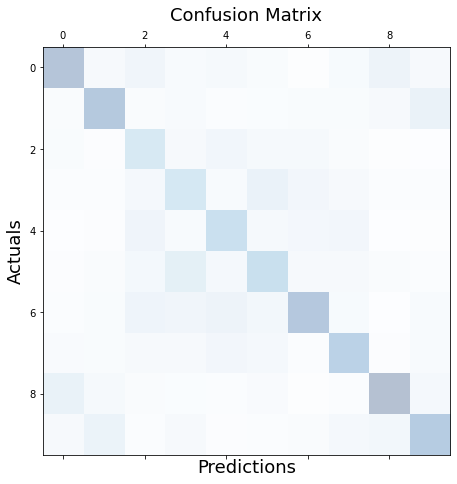

In [ ]:
predictions = model.predict(test_images)
all_predictions = np.array([])
for i in range(len(test_images)):
  prediction = np.array([np.argmax(predictions[i])])
  all_predictions = np.concatenate([all_predictions, prediction])
conf_mat = tf.math.confusion_matrix(all_predictions, test_labels)
print(conf_mat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# using relu in hidden layers

In [ ]:
model = keras.Sequential([
                          
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(1024, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_4 (Dense)             (None, 128)               131200    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,279,242
Trainable params: 3,279,242
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_relu = model.fit(train_images, train_labels, batch_size=256, epochs=70, validation_data=(test_images, test_labels))

Epoch 1/70
196/196 [==============================] - 2s 10ms/step - loss: 2.2340 - accuracy: 0.1799 - val_loss: 2.1659 - val_accuracy: 0.2206
Epoch 2/70
196/196 [==============================] - 2s 8ms/step - loss: 2.1227 - accuracy: 0.2488 - val_loss: 2.0886 - val_accuracy: 0.2667
Epoch 3/70
196/196 [==============================] - 2s 8ms/step - loss: 2.0608 - accuracy: 0.2742 - val_loss: 2.0379 - val_accuracy: 0.2919
Epoch 4/70
196/196 [==============================] - 2s 9ms/step - loss: 2.0158 - accuracy: 0.2951 - val_loss: 2.0002 - val_accuracy: 0.3102
Epoch 5/70
196/196 [==============================] - 2s 9ms/step - loss: 1.9830 - accuracy: 0.3098 - val_loss: 1.9715 - val_accuracy: 0.3193
Epoch 6/70
196/196 [==============================] - 2s 9ms/step - loss: 1.9569 - accuracy: 0.3195 - val_loss: 1.9490 - val_accuracy: 0.3312
Epoch 7/70
196/196 [==============================] - 2s 9ms/step - loss: 1.9350 - accuracy: 0.3283 - val_loss: 1.9281 - val_accuracy: 0.3345
Epoch

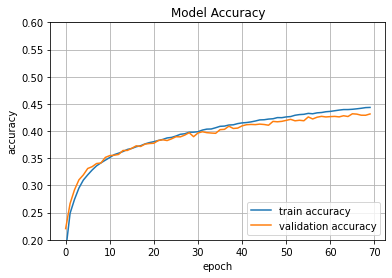

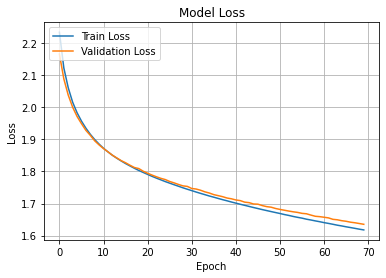

In [ ]:
plt.figure()
plt.plot(history_relu.history['accuracy'], label='train accuracy')
plt.plot(history_relu.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim([0.2, 0.6])
plt.legend(loc='lower right')
plt.grid()
plt.show()
##################################################
plt.figure()
plt.plot(history_relu.history['loss'] , label="Train Loss")
plt.plot(history_relu.history['val_loss'] , label = "Validation Loss")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.6352 - accuracy: 0.4315


frog


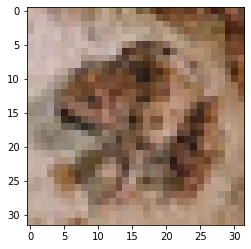

In [ ]:
random_index = random.randint(0, len(test_images) - 1)
output = model.predict(np.array([test_images[random_index]]))
print(class_names[np.argmax(output)])
plt.imshow(test_images[random_index])

tf.Tensor(
[[489  55 104  39  65  30  11  58 104  52]
 [ 35 499  36  49  26  34  28  42  74 165]
 [ 68  14 259  79 144  92  75  50  13   7]
 [ 19  32  60 255  32 158  67  54  22  34]
 [ 21  13 151  40 339  61  92  71  17  10]
 [ 22  34  87 218  71 343  84  69  38  26]
 [ 27  41 147 131 161 112 535  64  14  44]
 [ 52  49  73  73 100  93  43 487  22  53]
 [197  80  57  41  34  50  24  30 598  98]
 [ 70 183  26  75  28  27  41  75  98 511]], shape=(10, 10), dtype=int32)


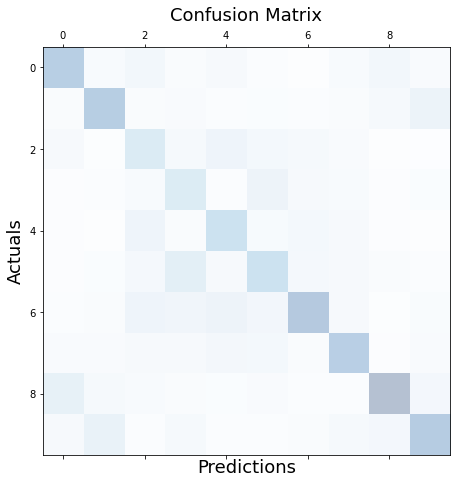

In [ ]:
predictions = model.predict(test_images)
all_predictions = np.array([])
for i in range(len(test_images)):
  prediction = np.array([np.argmax(predictions[i])])
  all_predictions = np.concatenate([all_predictions, prediction])
conf_mat = tf.math.confusion_matrix(all_predictions, test_labels)
print(conf_mat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## comparing Tanh & RELU

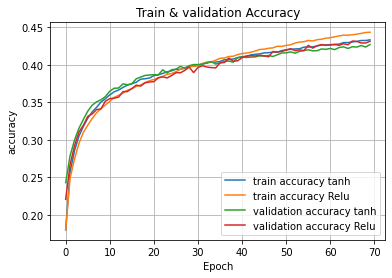

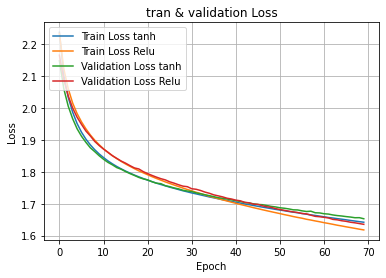

In [ ]:
# train_acc
plt.figure()
plt.plot(history_tanh.history['accuracy'], label='train accuracy tanh')
plt.plot(history_relu.history['accuracy'], label='train accuracy Relu')
# val acc
plt.plot(history_tanh.history['val_accuracy'], label='validation accuracy tanh')
plt.plot(history_relu.history['val_accuracy'], label='validation accuracy Relu')
plt.title('Train & validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid()
plt.show()
# train loss
plt.figure()
plt.plot(history_tanh.history['loss'] , label="Train Loss tanh")
plt.plot(history_relu.history['loss'] , label="Train Loss Relu")
# val loss
plt.plot(history_tanh.history['val_loss'] , label = "Validation Loss tanh")
plt.plot(history_relu.history['val_loss'] , label = "Validation Loss Relu")
plt.title('tran & validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()

# using mse for loss

In [ ]:
model = keras.Sequential([
                          
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(1024, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 128)               131200    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,279,242
Trainable params: 3,279,242
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss='mse', metrics=['accuracy'])

In [ ]:
history_MSE= model.fit(train_images, train_labels, batch_size=256, epochs=70, validation_data=(test_images, test_labels))

Epoch 1/70
196/196 [==============================] - 7s 18ms/step - loss: 27.6136 - accuracy: 0.1003 - val_loss: 27.6119 - val_accuracy: 0.0977
Epoch 2/70
196/196 [==============================] - 3s 14ms/step - loss: 27.6114 - accuracy: 0.1003 - val_loss: 27.6111 - val_accuracy: 0.1007
Epoch 3/70
196/196 [==============================] - 2s 9ms/step - loss: 27.6110 - accuracy: 0.1001 - val_loss: 27.6109 - val_accuracy: 0.0990
Epoch 4/70
196/196 [==============================] - 2s 9ms/step - loss: 27.6108 - accuracy: 0.1016 - val_loss: 27.6107 - val_accuracy: 0.0993
Epoch 5/70
196/196 [==============================] - 2s 10ms/step - loss: 27.6107 - accuracy: 0.1020 - val_loss: 27.6106 - val_accuracy: 0.1020
Epoch 6/70
196/196 [==============================] - 2s 12ms/step - loss: 27.6106 - accuracy: 0.1026 - val_loss: 27.6105 - val_accuracy: 0.1007
Epoch 7/70
196/196 [==============================] - 2s 12ms/step - loss: 27.6105 - accuracy: 0.1024 - val_loss: 27.6105 - val_accu

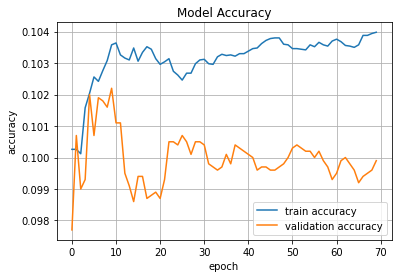

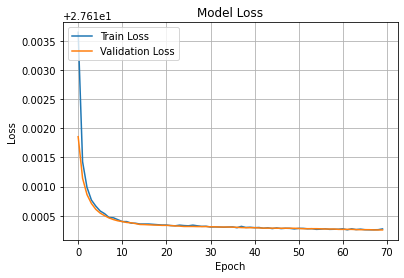

In [ ]:
plt.figure()
plt.plot(history_MSE.history['accuracy'], label='train accuracy')
plt.plot(history_MSE.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.ylim([0.2, 0.6])
plt.legend(loc='lower right')
plt.grid()
plt.show()
##################################################
plt.figure()
plt.plot(history_MSE.history['loss'] , label="Train Loss")
plt.plot(history_MSE.history['val_loss'] , label = "Validation Loss")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 27.6103 - accuracy: 0.0999


truck


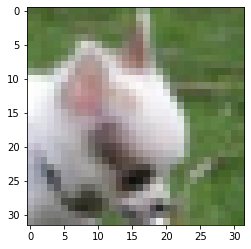

In [ ]:
random_index = random.randint(0, len(test_images) - 1)
output = model.predict(np.array([test_images[random_index]]))
print(class_names[np.argmax(output)])
plt.imshow(test_images[random_index])

tf.Tensor(
[[102 137  67  93  74 116 105  80 191 113]
 [ 73  67  86  69  86  87  56  98  82  60]
 [199  95  79  88  51  60  63  99 108 156]
 [103 151 102 153 101 156 146  83 126 121]
 [ 68 112  97 101  98 128  62 138 103 132]
 [125  72 106  78 104 120  73  76  83  85]
 [ 97  97 152  86 140  84 129 153 144 100]
 [ 58 122  97 108  96 107 122 143  67  90]
 [142  75  89  88  72  52  63  43  71 106]
 [ 33  72 125 136 178  90 181  87  25  37]], shape=(10, 10), dtype=int32)


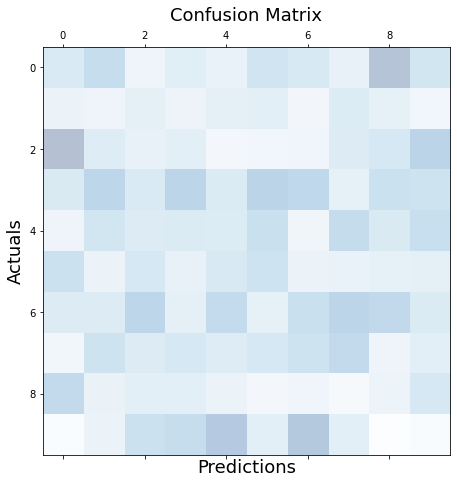

In [ ]:
predictions = model.predict(test_images)
all_predictions = np.array([])
for i in range(len(test_images)):
  prediction = np.array([np.argmax(predictions[i])])
  all_predictions = np.concatenate([all_predictions, prediction])
conf_mat = tf.math.confusion_matrix(all_predictions, test_labels)
print(conf_mat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# using cross entropy for loss

In [ ]:
model = keras.Sequential([
                          
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(1024, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_7 (Dense)             (None, 128)               131200    
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,279,242
Trainable params: 3,279,242
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_CE = model.fit(train_images, train_labels, batch_size=256, epochs=70, validation_data=(test_images, test_labels))

Epoch 1/70
196/196 [==============================] - 3s 11ms/step - loss: 1.8741 - accuracy: 0.3302 - val_loss: 1.7370 - val_accuracy: 0.3767
Epoch 2/70
196/196 [==============================] - 2s 10ms/step - loss: 1.6605 - accuracy: 0.4121 - val_loss: 1.6116 - val_accuracy: 0.4279
Epoch 3/70
196/196 [==============================] - 2s 10ms/step - loss: 1.5772 - accuracy: 0.4415 - val_loss: 1.6167 - val_accuracy: 0.4354
Epoch 4/70
196/196 [==============================] - 2s 10ms/step - loss: 1.5271 - accuracy: 0.4571 - val_loss: 1.5344 - val_accuracy: 0.4518
Epoch 5/70
196/196 [==============================] - 2s 10ms/step - loss: 1.4816 - accuracy: 0.4762 - val_loss: 1.4721 - val_accuracy: 0.4799
Epoch 6/70
196/196 [==============================] - 2s 10ms/step - loss: 1.4367 - accuracy: 0.4907 - val_loss: 1.4709 - val_accuracy: 0.4821
Epoch 7/70
196/196 [==============================] - 2s 9ms/step - loss: 1.4086 - accuracy: 0.5024 - val_loss: 1.4546 - val_accuracy: 0.4836


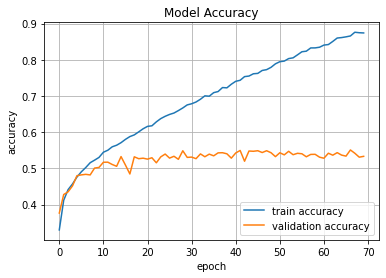

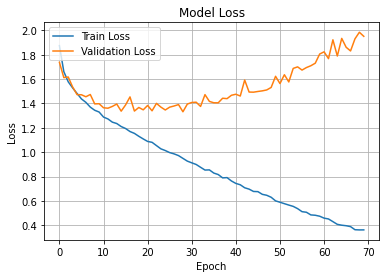

In [ ]:
plt.figure()
plt.plot(history_CE.history['accuracy'], label='train accuracy')
plt.plot(history_CE.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.ylim([0.2, 0.6])
plt.legend(loc='lower right')
plt.grid()
plt.show()
##################################################
plt.figure()
plt.plot(history_CE.history['loss'] , label="Train Loss")
plt.plot(history_CE.history['val_loss'] , label = "Validation Loss")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 1.9506 - accuracy: 0.5333


automobile


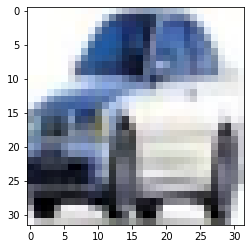

In [ ]:
random_index = random.randint(0, len(test_images) - 1)
output = model.predict(np.array([test_images[random_index]]))
print(class_names[np.argmax(output)])
plt.imshow(test_images[random_index])

tf.Tensor(
[[591  31  53  18  37  14   9  27  90  30]
 [ 25 594  15  15   8   4  14   7  63 169]
 [109  31 554 146 264 139 156  83  30  24]
 [ 20  24  87 383  67 183 108  47  27  31]
 [ 21   6  66  35 320  38  47  41  19  11]
 [ 24  15  69 194  67 445  65  78  20  20]
 [ 15  16  45  73  79  45 538  16   7  19]
 [ 21  24  79  84 118 104  36 656  14  45]
 [116  72  16  14  25   9  11  11 680  79]
 [ 58 187  16  38  15  19  16  34  50 572]], shape=(10, 10), dtype=int32)


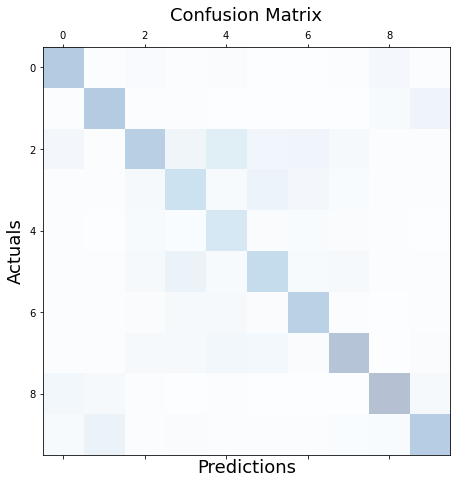

In [ ]:
predictions = model.predict(test_images)
all_predictions = np.array([])
for i in range(len(test_images)):
  prediction = np.array([np.argmax(predictions[i])])
  all_predictions = np.concatenate([all_predictions, prediction])
conf_mat = tf.math.confusion_matrix(all_predictions, test_labels)
print(conf_mat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparing Loss functions:  MSE VS CE 

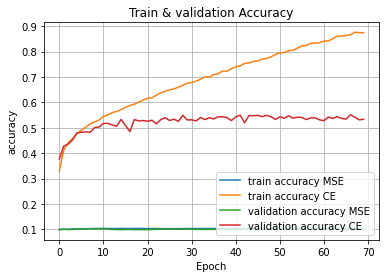

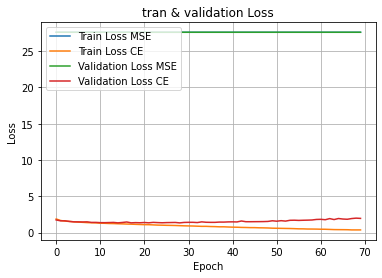

In [ ]:
# train_acc
plt.figure()
plt.plot(history_MSE.history['accuracy'], label='train accuracy MSE')
plt.plot(history_CE.history['accuracy'], label='train accuracy CE')
# val acc
plt.plot(history_MSE.history['val_accuracy'], label='validation accuracy MSE')
plt.plot(history_CE.history['val_accuracy'], label='validation accuracy CE')
plt.title('Train & validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid()
plt.show()
# train loss
plt.figure()
plt.plot(history_MSE.history['loss'] , label="Train Loss MSE")
plt.plot(history_CE.history['loss'] , label="Train Loss CE")
# val loss
plt.plot(history_MSE.history['val_loss'] , label = "Validation Loss MSE")
plt.plot(history_CE.history['val_loss'] , label = "Validation Loss CE")
plt.title('tran & validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()

# Using Adam optimizer

In [ ]:
model = keras.Sequential([
                          
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(1024, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_10 (Dense)            (None, 128)               131200    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 3,279,242
Trainable params: 3,279,242
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_Adam = model.fit(train_images, train_labels, batch_size=256, epochs=70, validation_data=(test_images, test_labels))

Epoch 1/70
196/196 [==============================] - 3s 13ms/step - loss: 2.0713 - accuracy: 0.2777 - val_loss: 1.8412 - val_accuracy: 0.3424
Epoch 2/70
196/196 [==============================] - 2s 11ms/step - loss: 1.7997 - accuracy: 0.3659 - val_loss: 1.7334 - val_accuracy: 0.3898
Epoch 3/70
196/196 [==============================] - 2s 11ms/step - loss: 1.6947 - accuracy: 0.3997 - val_loss: 1.6627 - val_accuracy: 0.4082
Epoch 4/70
196/196 [==============================] - 2s 11ms/step - loss: 1.6397 - accuracy: 0.4176 - val_loss: 1.6159 - val_accuracy: 0.4322
Epoch 5/70
196/196 [==============================] - 2s 10ms/step - loss: 1.5869 - accuracy: 0.4402 - val_loss: 1.5707 - val_accuracy: 0.4422
Epoch 6/70
196/196 [==============================] - 2s 10ms/step - loss: 1.5521 - accuracy: 0.4496 - val_loss: 1.6024 - val_accuracy: 0.4318
Epoch 7/70
196/196 [==============================] - 2s 10ms/step - loss: 1.5166 - accuracy: 0.4601 - val_loss: 1.5252 - val_accuracy: 0.4594

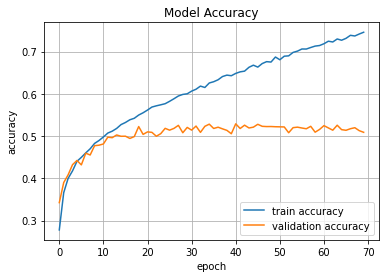

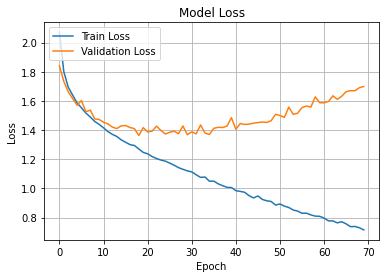

In [ ]:
plt.figure()
plt.plot(history_Adam.history['accuracy'], label='train accuracy')
plt.plot(history_Adam.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.ylim([0.2, 0.6])
plt.legend(loc='lower right')
plt.grid()
plt.show()
##################################################
plt.figure()
plt.plot(history_Adam.history['loss'] , label="Train Loss")
plt.plot(history_Adam.history['val_loss'] , label = "Validation Loss")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 1.6991 - accuracy: 0.5089


frog


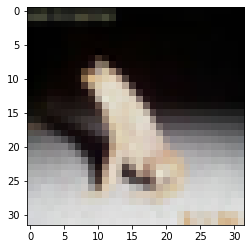

In [ ]:
random_index = random.randint(0, len(test_images) - 1)
output = model.predict(np.array([test_images[random_index]]))
print(class_names[np.argmax(output)])
plt.imshow(test_images[random_index])

tf.Tensor(
[[508  23  50  12  28  10   4  25  71  31]
 [ 43 616  13  21   4   6  11   8  68 179]
 [110  25 486  88 227  86 104  70  35  22]
 [ 65  55 121 428 120 307 130 111  62  70]
 [ 12   6  51  21 276  24  41  42  11   7]
 [ 33  15 107 223  74 399  52 100  24  22]
 [ 24  24  90 120 135  82 617  33  10  27]
 [ 24  28  47  46 105  65  23 571  17  36]
 [142  64  16  19  22   8   7  17 649  67]
 [ 39 144  19  22   9  13  11  23  53 539]], shape=(10, 10), dtype=int32)


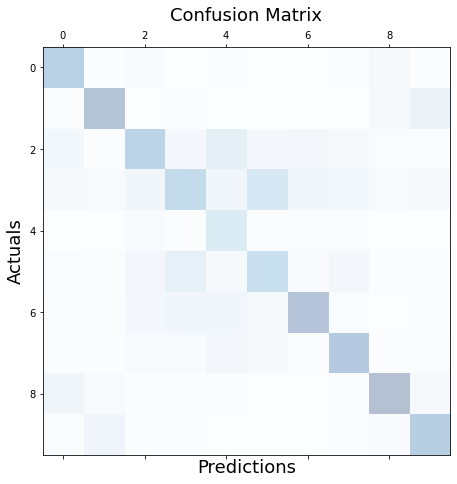

In [ ]:
predictions = model.predict(test_images)
all_predictions = np.array([])
for i in range(len(test_images)):
  prediction = np.array([np.argmax(predictions[i])])
  all_predictions = np.concatenate([all_predictions, prediction])
conf_mat = tf.math.confusion_matrix(all_predictions, test_labels)
print(conf_mat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# final model

In [ ]:
model = keras.Sequential([
                          
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(1024, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_4 (Dense)             (None, 128)               131200    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,279,242
Trainable params: 3,279,242
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.8), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_final = model.fit(train_images, train_labels, batch_size=256, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
196/196 [==============================] - 2s 11ms/step - loss: 1.8727 - accuracy: 0.3311 - val_loss: 1.7382 - val_accuracy: 0.3905
Epoch 2/20
196/196 [==============================] - 2s 8ms/step - loss: 1.6984 - accuracy: 0.4003 - val_loss: 1.6967 - val_accuracy: 0.4002
Epoch 3/20
196/196 [==============================] - 2s 9ms/step - loss: 1.6169 - accuracy: 0.4276 - val_loss: 1.6108 - val_accuracy: 0.4321
Epoch 4/20
196/196 [==============================] - 2s 9ms/step - loss: 1.5592 - accuracy: 0.4506 - val_loss: 1.5725 - val_accuracy: 0.4413
Epoch 5/20
196/196 [==============================] - 2s 9ms/step - loss: 1.5158 - accuracy: 0.4657 - val_loss: 1.5879 - val_accuracy: 0.4300
Epoch 6/20
196/196 [==============================] - 2s 9ms/step - loss: 1.4749 - accuracy: 0.4811 - val_loss: 1.5405 - val_accuracy: 0.4584
Epoch 7/20
196/196 [==============================] - 2s 9ms/step - loss: 1.4421 - accuracy: 0.4898 - val_loss: 1.4791 - val_accuracy: 0.4711
Epoch

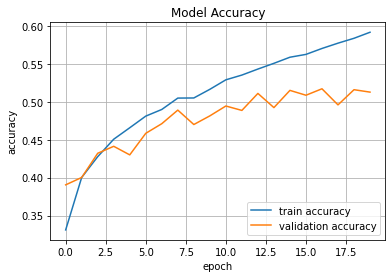

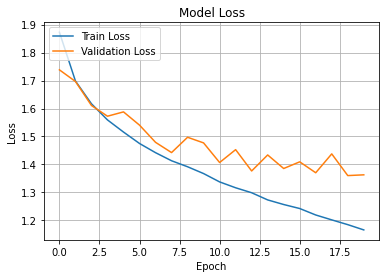

In [ ]:
plt.figure()
plt.plot(history_final.history['accuracy'], label='train accuracy')
plt.plot(history_final.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.ylim([0.2, 0.6])
plt.legend(loc='lower right')
plt.grid()
plt.show()
##################################################
plt.figure()
plt.plot(history_final.history['loss'] , label="Train Loss")
plt.plot(history_final.history['val_loss'] , label = "Validation Loss")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.3629 - accuracy: 0.5127


cat


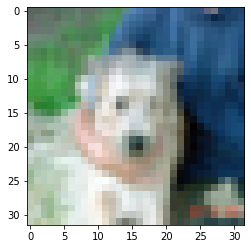

In [ ]:
random_index = random.randint(0, len(test_images) - 1)
output = model.predict(np.array([test_images[random_index]]))
print(class_names[np.argmax(output)])
plt.imshow(test_images[random_index])

# f1, recall, presision

tf.Tensor(
[[564  19  81  17  49  19   6  27  95  22]
 [ 42 572  19  24  15   9  14  13  62 101]
 [ 49   4 375  59 150  51  79  33   7   3]
 [  9   9  46 204  40  75  62  22   6  13]
 [ 14   4  78  25 335  36  79  39  12   4]
 [ 45  33 200 433 153 654 196 137  44  35]
 [ 17   8  55  53  84  24 469   9   2   8]
 [ 33  16  85  61 111  66  31 621  17  30]
 [106  43  18  25  25  15  12   8 604  26]
 [121 292  43  99  38  51  52  91 151 758]], shape=(10, 10), dtype=int32)


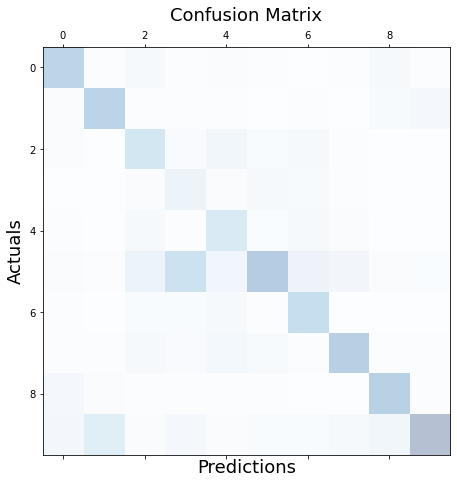

              precision    recall  f1-score   support

    airplane       0.63      0.56      0.59      1000
  automobile       0.66      0.57      0.61      1000
        bird       0.46      0.38      0.41      1000
         cat       0.42      0.20      0.27      1000
        deer       0.54      0.34      0.41      1000
         dog       0.34      0.65      0.45      1000
        frog       0.64      0.47      0.54      1000
       horse       0.58      0.62      0.60      1000
        ship       0.68      0.60      0.64      1000
       truck       0.45      0.76      0.56      1000

    accuracy                           0.52     10000
   macro avg       0.54      0.52      0.51     10000
weighted avg       0.54      0.52      0.51     10000



In [ ]:
predictions = model.predict(test_images)
all_predictions = np.array([])
for i in range(len(test_images)):
  prediction = np.array([np.argmax(predictions[i])])
  all_predictions = np.concatenate([all_predictions, prediction])
conf_mat = tf.math.confusion_matrix(all_predictions, test_labels)
print(conf_mat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import classification_report
print(classification_report(test_labels.reshape((10000, )), all_predictions, target_names=class_names))

# make imbalanced dataset

In [ ]:
#[0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', :6'frog', 7:'horse', 8:'ship', 8:'truck']
new_train_images_1 = train_images[:1]
new_train_labels_1 = train_labels[0]
for i  in range(10):
  if i == train_labels[0]:
    idx = (train_labels == i).reshape(train_images.shape[0])
    idx[0] = False
    filtered_images = train_images[idx]
    filtered_labels = np.array([i] * 4999)
  elif i == 0 or i == 2:
    idx = (train_labels == i).reshape(train_images.shape[0])
    filtered_images = train_images[idx]
    filtered_images = filtered_images[2500:]
    filtered_labels = np.array([i] * 2500)
  else:
    idx = (train_labels == i).reshape(train_images.shape[0])
    filtered_images = train_images[idx]
    filtered_labels = np.array([i] * 5000)
  new_train_images_1 = np.concatenate([new_train_images_1, filtered_images])
  new_train_labels_1 = np.concatenate([new_train_labels_1, filtered_labels])

tf.Tensor(7, shape=(), dtype=int64)


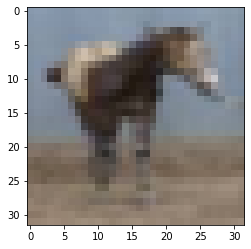

In [ ]:
indices = tf.range(start=0, limit=tf.shape(new_train_images_1)[0], dtype=tf.int32)
idx = tf.random.shuffle(indices)
new_train_images_1 = tf.gather(new_train_images_1, idx)
new_train_labels_1 = tf.gather(new_train_labels_1, idx)
plt.imshow(new_train_images_1[10030])
print(new_train_labels_1[10030])

In [ ]:
model = keras.Sequential([
                          
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(1024, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_7 (Dense)             (None, 128)               131200    
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,279,242
Trainable params: 3,279,242
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01 ,momentum=0.8), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(new_train_images_1,new_train_labels_1, batch_size=256, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
176/176 [==============================] - 3s 16ms/step - loss: 1.8714 - accuracy: 0.3426 - val_loss: 1.8218 - val_accuracy: 0.3581
Epoch 2/20
176/176 [==============================] - 2s 14ms/step - loss: 1.6760 - accuracy: 0.4173 - val_loss: 1.6948 - val_accuracy: 0.4119
Epoch 3/20
176/176 [==============================] - 2s 13ms/step - loss: 1.5954 - accuracy: 0.4435 - val_loss: 1.6308 - val_accuracy: 0.4295
Epoch 4/20
176/176 [==============================] - 2s 13ms/step - loss: 1.5417 - accuracy: 0.4620 - val_loss: 1.5729 - val_accuracy: 0.4470
Epoch 5/20
176/176 [==============================] - 2s 12ms/step - loss: 1.4979 - accuracy: 0.4764 - val_loss: 1.5392 - val_accuracy: 0.4532
Epoch 6/20
176/176 [==============================] - 2s 11ms/step - loss: 1.4582 - accuracy: 0.4912 - val_loss: 1.5333 - val_accuracy: 0.4546
Epoch 7/20
176/176 [==============================] - 2s 11ms/step - loss: 1.4302 - accuracy: 0.5029 - val_loss: 1.5002 - val_accuracy: 0.4701

tf.Tensor(
[[405   7  71  21  36  11   6  16  26   9]
 [ 54 671  33  30   9  14  18  20  59 212]
 [  7   0  71   4   6   7   4   3   0   1]
 [ 22  15 117 362  57 231  87  59  20  27]
 [ 46  12 296  90 540 100 139  90  13  12]
 [ 17   7  97 168  45 377  33  66  10  12]
 [ 22  12 123 131 127  76 632  24   2  15]
 [ 29  18  83  60  88  84  22 584  13  37]
 [334 122  76  68  66  58  29  51 812 108]
 [ 64 136  33  66  26  42  30  87  45 567]], shape=(10, 10), dtype=int32)


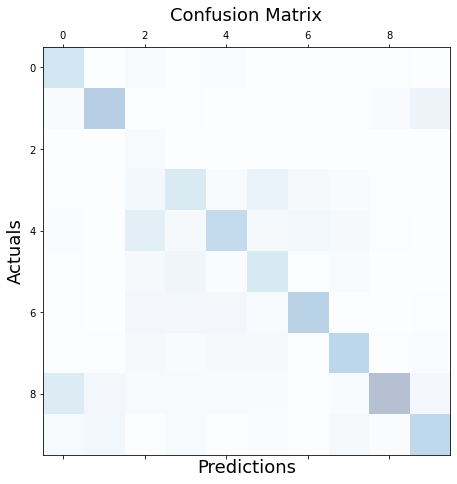

average precision = 0.5
average recall = 0.5140105078809106
f1 score = 0.5069084628670121


In [ ]:
predictions = model.predict(test_images)
all_predictions = np.array([])
for i in range(len(test_images)):
  prediction = np.array([np.argmax(predictions[i])])
  all_predictions = np.concatenate([all_predictions, prediction])
conf_mat = tf.math.confusion_matrix(all_predictions, test_labels)
print(conf_mat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Random undersampling

In [ ]:
npdata=new_train_images_1.numpy()
nplabel = (new_train_labels_1.numpy())
nplabel[0]


6

In [ ]:
#[0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', :6'frog', 7:'horse', 8:'ship', 8:'truck']
sampled_train_images_1 = npdata[:1]
sampled_train_labels_1 = nplabel[0:1]
for i  in range(10):
  if i == nplabel[0]:
    idx = (nplabel == i).reshape(npdata.shape[0])
    idx[0] = False
    filtered_images = npdata[idx]
    filtered_images = filtered_images[2501:]
    filtered_labels = np.array([i] * 2499)
  elif i == 0 or i == 2:
    idx = (nplabel == i).reshape(npdata.shape[0])
    filtered_images = npdata[idx]
    filtered_labels = np.array([i] * 2500)
  else:
    idx = (nplabel == i).reshape(npdata.shape[0])
    filtered_images = npdata[idx]
    filtered_images = filtered_images[2500:]
    filtered_labels = np.array([i] * 2500)
  sampled_train_images_1 = np.concatenate([sampled_train_images_1, filtered_images])
  sampled_train_labels_1 = np.concatenate([sampled_train_labels_1, filtered_labels])

tf.Tensor(0, shape=(), dtype=int64)


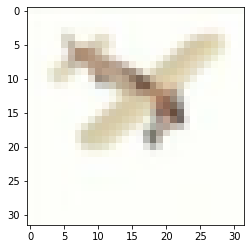

In [ ]:
indices = tf.range(start=0, limit=tf.shape(sampled_train_images_1)[0], dtype=tf.int32)
idx = tf.random.shuffle(indices)
sampled_train_images_1 = tf.gather(sampled_train_images_1, idx)
sampled_train_labels_1 = tf.gather(sampled_train_labels_1, idx)
plt.imshow(sampled_train_images_1[10030])
print(sampled_train_labels_1[10030])

In [ ]:
model = keras.Sequential([
                          
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(1024, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')

])

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01 ,momentum=0.8), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(sampled_train_images_1,sampled_train_labels_1, batch_size=256, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
98/98 [==============================] - 2s 17ms/step - loss: 1.3445 - accuracy: 0.5271 - val_loss: 1.4443 - val_accuracy: 0.4902
Epoch 2/20
98/98 [==============================] - 1s 14ms/step - loss: 1.3241 - accuracy: 0.5364 - val_loss: 1.4618 - val_accuracy: 0.4772
Epoch 3/20
98/98 [==============================] - 2s 15ms/step - loss: 1.2973 - accuracy: 0.5427 - val_loss: 1.4203 - val_accuracy: 0.4971
Epoch 4/20
98/98 [==============================] - 1s 15ms/step - loss: 1.2867 - accuracy: 0.5487 - val_loss: 1.3797 - val_accuracy: 0.5055
Epoch 5/20
98/98 [==============================] - 2s 16ms/step - loss: 1.2621 - accuracy: 0.5536 - val_loss: 1.4421 - val_accuracy: 0.4932
Epoch 6/20
98/98 [==============================] - 1s 14ms/step - loss: 1.2530 - accuracy: 0.5610 - val_loss: 1.4313 - val_accuracy: 0.4854
Epoch 7/20
98/98 [==============================] - 1s 15ms/step - loss: 1.2215 - accuracy: 0.5723 - val_loss: 1.3787 - val_accuracy: 0.5076
Epoch 8/20
98

tf.Tensor(
[[541  37  73  20  45  20   3  40  96  43]
 [ 21 527   9  10   5   6   6  10  36 105]
 [ 58   6 301  37 105  33  39  39  11   6]
 [ 79  55 189 554 134 402 159 156  67  74]
 [ 29   2 114  29 364  50  46  44  19   6]
 [ 17   9  71 112  34 308  21  58  10  17]
 [ 33  27 140 132 185  89 661  33  13  20]
 [ 22  22  65  34  77  48  17 548   8  32]
 [143  81  21  19  26  20  14  13 682  66]
 [ 57 234  17  53  25  24  34  59  58 631]], shape=(10, 10), dtype=int32)


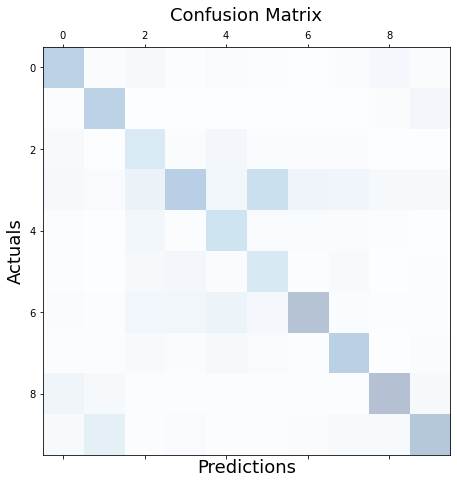

average precision = 0.5
average recall = 0.49501280863356406
f1 score = 0.49749390594615317


In [ ]:
predictions = model.predict(test_images)
all_predictions = np.array([])
for i in range(len(test_images)):
  prediction = np.array([np.argmax(predictions[i])])
  all_predictions = np.concatenate([all_predictions, prediction])
conf_mat = tf.math.confusion_matrix(all_predictions, test_labels)
print(conf_mat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


# CNN

## basic CNN

In [ ]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same',  input_shape=(32, 32, 3)))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(32,(3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1024))
model.add(layers.Activation('relu'))
model.add(layers.Dense(128))
model.add(layers.Activation('relu'))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_5 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 28800)             0         
                                                                 
 dense_6 (Dense)             (None, 1024)              29492224  
                                                                 
 activation_7 (Activation)   (None, 1024)             

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01 ,momentum=0.8), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_CNN_a = model.fit(train_images, train_labels, batch_size=256, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
196/196 [==============================] - 11s 53ms/step - loss: 1.8400 - accuracy: 0.3433 - val_loss: 1.6486 - val_accuracy: 0.4184
Epoch 2/20
196/196 [==============================] - 10s 50ms/step - loss: 1.5475 - accuracy: 0.4505 - val_loss: 1.4598 - val_accuracy: 0.4813
Epoch 3/20
196/196 [==============================] - 10s 51ms/step - loss: 1.4012 - accuracy: 0.5037 - val_loss: 1.3809 - val_accuracy: 0.5232
Epoch 4/20
196/196 [==============================] - 10s 50ms/step - loss: 1.2939 - accuracy: 0.5427 - val_loss: 1.2980 - val_accuracy: 0.5442
Epoch 5/20
196/196 [==============================] - 10s 51ms/step - loss: 1.2032 - accuracy: 0.5751 - val_loss: 1.2231 - val_accuracy: 0.5682
Epoch 6/20
196/196 [==============================] - 10s 51ms/step - loss: 1.1163 - accuracy: 0.6051 - val_loss: 1.1939 - val_accuracy: 0.5774
Epoch 7/20
196/196 [==============================] - 10s 51ms/step - loss: 1.0328 - accuracy: 0.6360 - val_loss: 1.1785 - val_accuracy:

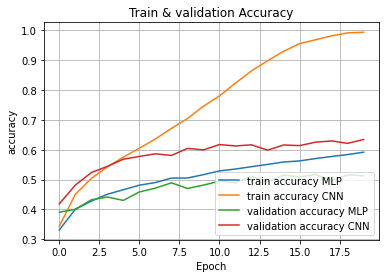

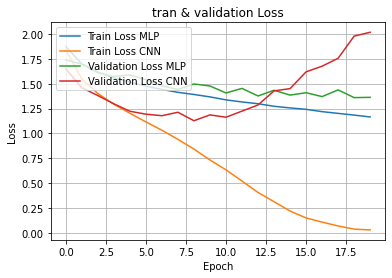

In [ ]:
# train_acc
plt.figure()
plt.plot(history_final.history['accuracy'], label='train accuracy MLP')
plt.plot(history_CNN_a.history['accuracy'], label='train accuracy CNN')
# val acc
plt.plot(history_final.history['val_accuracy'], label='validation accuracy MLP')
plt.plot(history_CNN_a.history['val_accuracy'], label='validation accuracy CNN')
plt.title('Train & validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid()
plt.show()
# train loss
plt.figure()
plt.plot(history_final.history['loss'] , label="Train Loss MLP")
plt.plot(history_CNN_a.history['loss'] , label="Train Loss CNN")
# val loss
plt.plot(history_final.history['val_loss'] , label = "Validation Loss MLP")
plt.plot(history_CNN_a.history['val_loss'] , label = "Validation Loss CNN")
plt.title('tran & validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()

In [ ]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same',  input_shape=(32, 32, 3)))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(32,(3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1024))
model.add(layers.Activation('relu'))
model.add(layers.Dense(128))
model.add(layers.Activation('relu'))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))


In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01 ,momentum=0.8), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_CNN_a2 = model.fit(train_images, train_labels, batch_size=256, epochs=7, validation_data=(test_images, test_labels))

Epoch 1/7
196/196 [==============================] - 11s 53ms/step - loss: 1.8547 - accuracy: 0.3328 - val_loss: 1.6334 - val_accuracy: 0.4267
Epoch 2/7
196/196 [==============================] - 10s 50ms/step - loss: 1.5158 - accuracy: 0.4610 - val_loss: 1.4433 - val_accuracy: 0.4868
Epoch 3/7
196/196 [==============================] - 10s 51ms/step - loss: 1.3673 - accuracy: 0.5155 - val_loss: 1.3377 - val_accuracy: 0.5322
Epoch 4/7
196/196 [==============================] - 10s 51ms/step - loss: 1.2578 - accuracy: 0.5563 - val_loss: 1.2496 - val_accuracy: 0.5592
Epoch 5/7
196/196 [==============================] - 10s 51ms/step - loss: 1.1570 - accuracy: 0.5916 - val_loss: 1.1819 - val_accuracy: 0.5821
Epoch 6/7
196/196 [==============================] - 10s 51ms/step - loss: 1.0532 - accuracy: 0.6293 - val_loss: 1.1728 - val_accuracy: 0.5878
Epoch 7/7
196/196 [==============================] - 10s 51ms/step - loss: 0.9455 - accuracy: 0.6677 - val_loss: 1.1371 - val_accuracy: 0.6014

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 1.1371 - accuracy: 0.6014


tf.Tensor(
[[727  23  96  29  40  23   8  30 125  36]
 [ 59 786  22  29  15  12  24  12 103 177]
 [ 29   8 490  55 174  76  45  41  17   8]
 [  9  15  80 439  69 229  36  79  23  20]
 [  7   1  63  51 393  55  23  73   6   3]
 [ 12   2  58 129  46 453  17  69   6   6]
 [ 32  13 125 189 189  91 811  42  16  17]
 [ 12   4  32  22  44  34   8 588   4  20]
 [ 51  18  13  17  14   8  10   4 635  21]
 [ 62 130  21  40  16  19  18  62  65 692]], shape=(10, 10), dtype=int32)


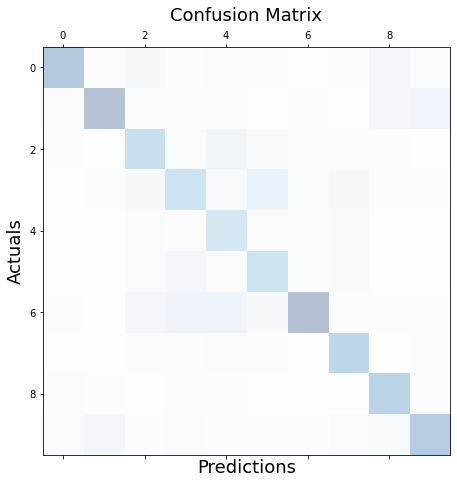

In [ ]:
predictions = model.predict(test_images)
all_predictions = np.array([])
for i in range(len(test_images)):
  prediction = np.array([np.argmax(predictions[i])])
  all_predictions = np.concatenate([all_predictions, prediction])
conf_mat = tf.math.confusion_matrix(all_predictions, test_labels)
print(conf_mat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## add batch normalization and pooling

In [ ]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same',  input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(32,(3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation_15 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_16 (Activation)  (None, 30, 30, 32)       

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01 ,momentum=0.8), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_pool_Batch = model.fit(train_images, train_labels, batch_size=256, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
196/196 [==============================] - 9s 39ms/step - loss: 1.4297 - accuracy: 0.4947 - val_loss: 3.6773 - val_accuracy: 0.1317
Epoch 2/20
196/196 [==============================] - 7s 37ms/step - loss: 0.9928 - accuracy: 0.6573 - val_loss: 2.0237 - val_accuracy: 0.3250
Epoch 3/20
196/196 [==============================] - 7s 37ms/step - loss: 0.7699 - accuracy: 0.7412 - val_loss: 1.3555 - val_accuracy: 0.5512
Epoch 4/20
196/196 [==============================] - 7s 37ms/step - loss: 0.5908 - accuracy: 0.8086 - val_loss: 1.0137 - val_accuracy: 0.6485
Epoch 5/20
196/196 [==============================] - 7s 37ms/step - loss: 0.4351 - accuracy: 0.8712 - val_loss: 1.1609 - val_accuracy: 0.6283
Epoch 6/20
196/196 [==============================] - 7s 37ms/step - loss: 0.3014 - accuracy: 0.9217 - val_loss: 1.3266 - val_accuracy: 0.5991
Epoch 7/20
196/196 [==============================] - 7s 37ms/step - loss: 0.1948 - accuracy: 0.9613 - val_loss: 1.0601 - val_accuracy: 0.6648

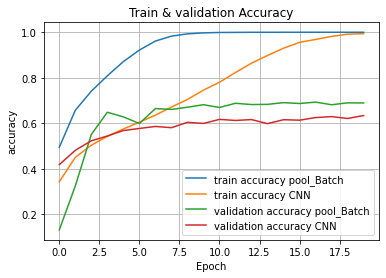

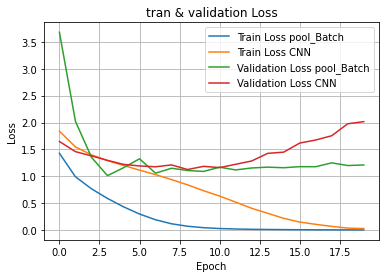

In [ ]:
# train_acc
plt.figure()
plt.plot(history_pool_Batch.history['accuracy'], label='train accuracy pool_Batch')
plt.plot(history_CNN_a.history['accuracy'], label='train accuracy CNN')
# val acc
plt.plot(history_pool_Batch.history['val_accuracy'], label='validation accuracy pool_Batch')
plt.plot(history_CNN_a.history['val_accuracy'], label='validation accuracy CNN')
plt.title('Train & validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid()
plt.show()
# train loss
plt.figure()
plt.plot(history_pool_Batch.history['loss'] , label="Train Loss pool_Batch")
plt.plot(history_CNN_a.history['loss'] , label="Train Loss CNN")
# val loss
plt.plot(history_pool_Batch.history['val_loss'] , label = "Validation Loss pool_Batch")
plt.plot(history_CNN_a.history['val_loss'] , label = "Validation Loss CNN")
plt.title('tran & validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid()

## add dropout

In [ ]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same',  input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(32,(3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_20 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_21 (Activation)  (None, 30, 30, 32)       

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01 ,momentum=0.8), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=256, epochs=15, validation_data=(test_images, test_labels))

Epoch 1/15
196/196 [==============================] - 9s 39ms/step - loss: 1.5980 - accuracy: 0.4331 - val_loss: 3.0495 - val_accuracy: 0.1376
Epoch 2/15
196/196 [==============================] - 7s 37ms/step - loss: 1.2054 - accuracy: 0.5713 - val_loss: 2.5332 - val_accuracy: 0.2745
Epoch 3/15
196/196 [==============================] - 7s 36ms/step - loss: 1.0453 - accuracy: 0.6294 - val_loss: 1.1034 - val_accuracy: 0.6095
Epoch 4/15
196/196 [==============================] - 7s 36ms/step - loss: 0.9243 - accuracy: 0.6744 - val_loss: 1.2354 - val_accuracy: 0.5768
Epoch 5/15
196/196 [==============================] - 7s 37ms/step - loss: 0.8367 - accuracy: 0.7076 - val_loss: 0.9585 - val_accuracy: 0.6598
Epoch 6/15
196/196 [==============================] - 7s 37ms/step - loss: 0.7595 - accuracy: 0.7315 - val_loss: 1.0199 - val_accuracy: 0.6420
Epoch 7/15
196/196 [==============================] - 7s 36ms/step - loss: 0.6910 - accuracy: 0.7591 - val_loss: 0.8979 - val_accuracy: 0.6822

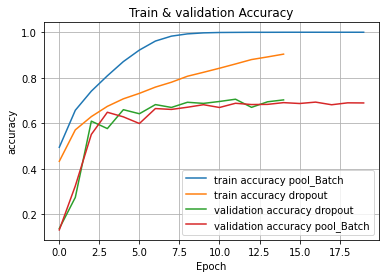

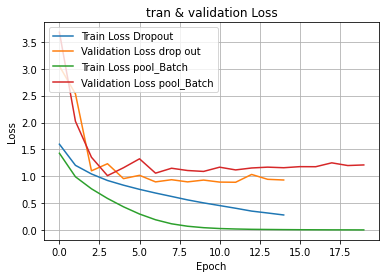

In [ ]:
# train_acc
plt.figure()
plt.plot(history_pool_Batch.history['accuracy'], label='train accuracy pool_Batch')
plt.plot(history.history['accuracy'], label='train accuracy dropout')
plt.plot(history.history['val_accuracy'], label='validation accuracy dropout')
plt.plot(history_pool_Batch.history['val_accuracy'], label='validation accuracy pool_Batch')
plt.title('Train & validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid()
plt.show()
# train loss
plt.figure()
plt.plot(history.history['loss'] , label="Train Loss Dropout")
plt.plot(history.history['val_loss'] , label = "Validation Loss drop out")
plt.plot(history_pool_Batch.history['loss'] , label="Train Loss pool_Batch")
plt.plot(history_pool_Batch.history['val_loss'] , label = "Validation Loss pool_Batch")
plt.title('tran & validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.9331 - accuracy: 0.7028


# Q2 : make new images

## PART B

Text(0.5, 1.0, 'original image:automobile')

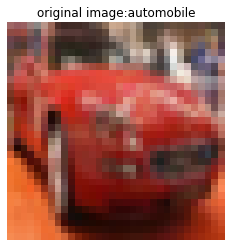

In [ ]:
x = train_images[5:6]
plt.figure()
plt.imshow(x[0])
plt.axis('off')
plt.title('original image:'+class_names[train_labels[5][0]])

### Random Rotations
The image rotation technique enables the model by generating images of different orientations.

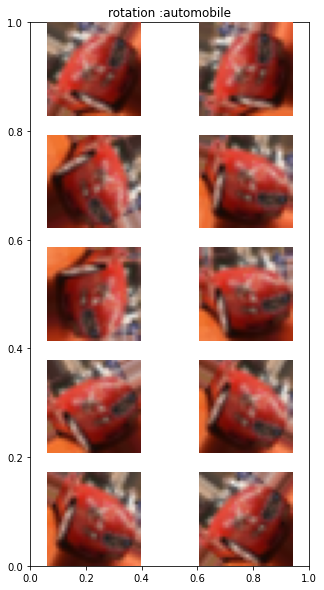

In [ ]:
str1 = "rotation :"
row = 5
col = 2
x = train_images[5:6]
datagen = ImageDataGenerator(rotation_range=90)
aug_iter = datagen.flow(x, batch_size=1)
fig = plt.figure(figsize=(5, 10))
plt.title(str1+class_names[train_labels[5][0]])
for index in range(1, row * col + 1):
    fig.add_subplot(row, col, index)
    plt.imshow(aug_iter.next()[0])
    plt.axis('off')


### Random Shifts
The random shifts technique helps in improving those images that are not properly positioned. There can be a scenario where they are not in the center of actual orientation.

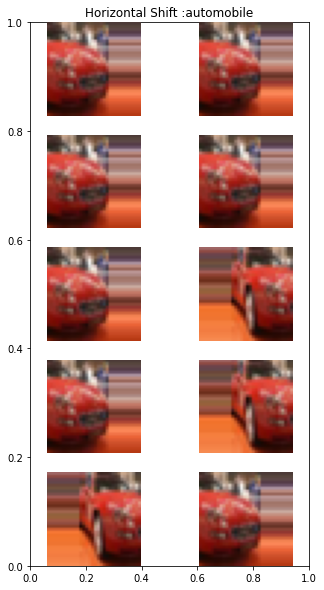

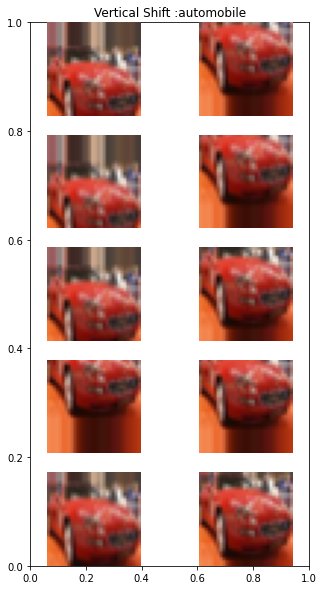

In [ ]:
## Horizontal Shift Example
str1 = "Horizontal Shift :"
row = 5
col = 2
x = train_images[5:6]
datagen = ImageDataGenerator(width_shift_range=[-10,10])
aug_iter = datagen.flow(x, batch_size=1)
fig = plt.figure(figsize=(5, 10))
plt.title(str1+class_names[train_labels[5][0]])
for index in range(1, row * col + 1):
    fig.add_subplot(row, col, index)
    plt.imshow(aug_iter.next()[0])
    plt.axis('off')
# Vertical Shift Example
str1 = "Vertical Shift :"
row = 5
col = 2
x = train_images[5:6]
datagen = ImageDataGenerator(height_shift_range=0.5)
aug_iter = datagen.flow(x, batch_size=1)
fig = plt.figure(figsize=(5, 10))
plt.title(str1+class_names[train_labels[5][0]])
for index in range(1, row * col + 1):
    fig.add_subplot(row, col, index)
    plt.imshow(aug_iter.next()[0])
    plt.axis('off')

### Random flip
one beneficial technique for performing augmentation is the flipping of images. ImageDataGenerator helps in flipping the images, it can either flip horizontally or vertically.

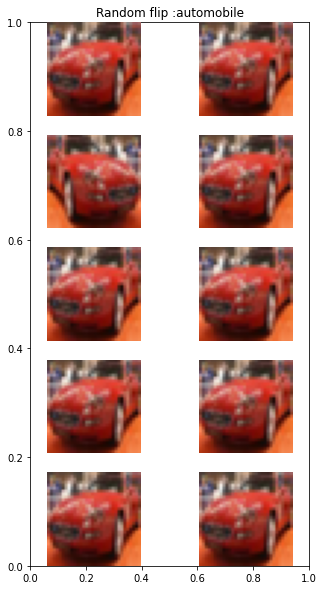

In [ ]:
str1 = "Random flip :"
row = 5
col = 2
x = train_images[5:6]
datagen = ImageDataGenerator(horizontal_flip=True)
aug_iter = datagen.flow(x, batch_size=1)
fig = plt.figure(figsize=(5, 10))
plt.title(str1 + class_names[train_labels[5][0]])
for index in range(1, row * col + 1):
    fig.add_subplot(row, col, index)
    plt.imshow(aug_iter.next()[0])
    plt.axis('off')


### Random Brightness
The fourth kind of augmentation technique is altering the brightness of images. This is the most useful technique as in most cases we have images with low or almost no lighting. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

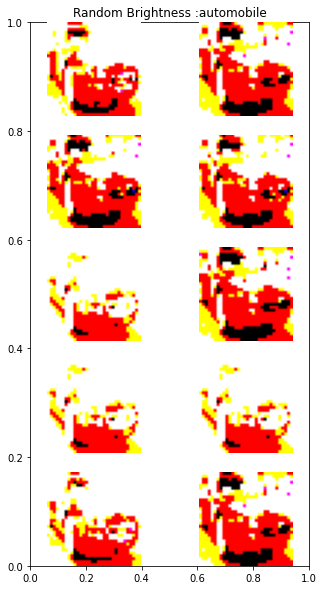

In [ ]:
str1 = "Random Brightness :"
row = 5
col = 2
x = train_images[5:6]
datagen = ImageDataGenerator(brightness_range=[0.012,0.03])
aug_iter = datagen.flow(x, batch_size=1)
fig = plt.figure(figsize=(5, 10))
plt.title(str1+class_names[train_labels[5][0]])
for index in range(1, row * col + 1):
    fig.add_subplot(row, col, index)
    plt.imshow(aug_iter.next()[0])
    plt.axis('off')


###Random Zoom
one technique is zooming in or zooming out on any image.
zoom in < 1
zoom out > 1

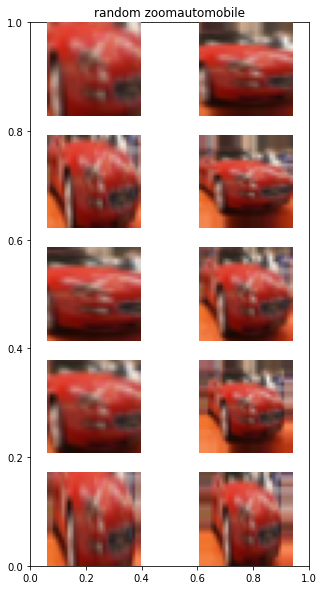

In [ ]:
str1 = "random zoom"
row = 5
col = 2
x = train_images[5:6]
datagen = ImageDataGenerator(zoom_range=[0.5,1.3])
aug_iter = datagen.flow(x, batch_size=1)
fig = plt.figure(figsize=(5, 10))
plt.title(str1+class_names[train_labels[5][0]])
for index in range(1, row * col + 1):
    fig.add_subplot(row, col, index)
    plt.imshow(aug_iter.next()[0])
    plt.axis('off')


## Part C

In [ ]:
#[0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', :6'frog', 7:'horse', 8:'ship', 8:'truck']
new_train_images_2 = train_images[:1]
new_train_labels_2 = train_labels[0]
for i  in range(10):
  if i == train_labels[0]:
    idx = (train_labels == i).reshape(train_images.shape[0])
    idx[0] = False
    filtered_images = train_images[idx]
    filtered_labels = np.array([i] * 4999)
  elif i == 3 or i == 5:
    idx = (train_labels == i).reshape(train_images.shape[0])
    filtered_images = train_images[idx]
    filtered_images = filtered_images[4500:]
    filtered_labels = np.array([i] * 500)
  else:
    idx = (train_labels == i).reshape(train_images.shape[0])
    filtered_images = train_images[idx]
    filtered_labels = np.array([i] * 5000)
  new_train_images_2 = np.concatenate([new_train_images_2, filtered_images])
  new_train_labels_2 = np.concatenate([new_train_labels_2, filtered_labels])

In [ ]:
print("train Images type : ",type(new_train_images_2),"Train Images shape : " , new_train_images_2.shape)
print("train_labels type : " , type(new_train_labels_2),"Train labels shape : " , new_train_labels_2.shape)


train Images type :  <class 'numpy.ndarray'> Train Images shape :  (41000, 32, 32, 3)
train_labels type :  <class 'numpy.ndarray'> Train labels shape :  (41000,)


In [ ]:
indices = tf.range(start=0, limit=tf.shape(new_train_images_2)[0], dtype=tf.int32)
idx = tf.random.shuffle(indices)
new_train_images_2 = tf.gather(new_train_images_2, idx)
new_train_labels_2 = tf.gather(new_train_labels_2, idx)


In [ ]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same',  input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(32,(3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_25 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_26 (Activation)  (None, 30, 30, 32)       

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01 ,momentum=0.8), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(new_train_images_2,new_train_labels_2, batch_size=256, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
161/161 [==============================] - 8s 41ms/step - loss: 1.6789 - accuracy: 0.4152 - val_loss: 2.9905 - val_accuracy: 0.1328
Epoch 2/20
161/161 [==============================] - 7s 40ms/step - loss: 1.3028 - accuracy: 0.5366 - val_loss: 2.1881 - val_accuracy: 0.2792
Epoch 3/20
161/161 [==============================] - 7s 44ms/step - loss: 1.1577 - accuracy: 0.5893 - val_loss: 1.7246 - val_accuracy: 0.4693
Epoch 4/20
161/161 [==============================] - 6s 40ms/step - loss: 1.0677 - accuracy: 0.6225 - val_loss: 1.5469 - val_accuracy: 0.5025
Epoch 5/20
161/161 [==============================] - 6s 38ms/step - loss: 0.9896 - accuracy: 0.6527 - val_loss: 1.4698 - val_accuracy: 0.5044
Epoch 6/20
161/161 [==============================] - 6s 38ms/step - loss: 0.9280 - accuracy: 0.6787 - val_loss: 1.3655 - val_accuracy: 0.5680
Epoch 7/20
161/161 [==============================] - 6s 38ms/step - loss: 0.8717 - accuracy: 0.6967 - val_loss: 1.3415 - val_accuracy: 0.5686

tf.Tensor(
[[744   5  70  36  21  18   5  15  53  22]
 [ 27 879   6  38   7  28   8   8  46 127]
 [ 55   4 581 151  62 220  31  49   9   5]
 [  0   0   0  42   1  26   0   0   0   1]
 [ 22   1 115 189 705 133  38  58   6   4]
 [  0   1  14  59   3 167   1   4   0   0]
 [ 17  16 124 296  98 142 895  21   9   8]
 [ 11   3  59 116  81 220   5 827   4  24]
 [ 79  24  19  53  18  29  12   4 845  33]
 [ 45  67  12  20   4  17   5  14  28 776]], shape=(10, 10), dtype=int32)


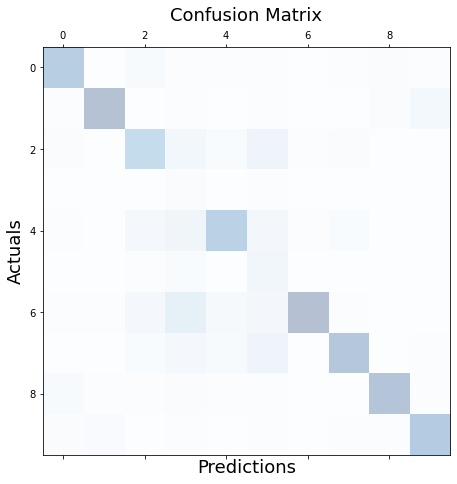

In [ ]:
predictions = model.predict(test_images)
all_predictions = np.array([])
for i in range(len(test_images)):
  prediction = np.array([np.argmax(predictions[i])])
  all_predictions = np.concatenate([all_predictions, prediction])
conf_mat = tf.math.confusion_matrix(all_predictions, test_labels)
print(conf_mat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


## Part D

In [ ]:
print(new_train_labels_2[0])
s_data=new_train_images_2.numpy()
slabel = (new_train_labels_2.numpy())
print("train Images type : ",type(s_data),"Train Images shape : " , s_data.shape)
print("train_labels type : " , type(slabel),"Train labels shape : " , slabel.shape)

idx = (slabel == 3)
np.sum(idx)

tf.Tensor(7, shape=(), dtype=int64)
train Images type :  <class 'numpy.ndarray'> Train Images shape :  (41000, 32, 32, 3)
train_labels type :  <class 'numpy.ndarray'> Train labels shape :  (41000,)


500

In [ ]:
#[0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', :6'frog', 7:'horse', 8:'ship', 8:'truck']
new_train_images_3 = s_data[:1]
new_train_labels_3 = slabel[0:1]
for i  in range(10):
  if i == 3 or i == 5:
    print(1)
    idx = (slabel == i).reshape(s_data.shape[0])
    filtered_images = s_data[idx]
    datagen = ImageDataGenerator(rotation_range=90,width_shift_range=[-10,10],horizontal_flip=True)
    aug_iter = datagen.flow(filtered_images, batch_size=filtered_images.shape[0])
    for j in range(0,9):
      augment_images = aug_iter.next()
      filtered_images = np.concatenate([filtered_images, augment_images])
    filtered_labels = np.array([i] * 5000)
    print(filtered_labels)
  elif i == slabel[0]:
    idx = (slabel == i).reshape(s_data.shape[0])
    idx[0] = False
    filtered_images = s_data[idx]
    filtered_labels = np.array([i] * 4999)
  else:
    idx = (slabel == i).reshape(s_data.shape[0])
    filtered_images = s_data[idx]
    filtered_labels = np.array([i] * 5000)
  new_train_images_3 = np.concatenate([new_train_images_3, filtered_images])
  new_train_labels_3 = np.concatenate([new_train_labels_3, filtered_labels])

1
[3 3 3 ... 3 3 3]
1
[5 5 5 ... 5 5 5]


In [ ]:
idx2 = (new_train_labels_3 == 3)
np.sum(idx2)

5000

In [ ]:
print("train Images type : ",type(new_train_images_3),"Train Images shape : " , new_train_images_3.shape)
print("train_labels type : " , type(new_train_labels_3),"Train labels shape : " , new_train_labels_3.shape)

train Images type :  <class 'numpy.ndarray'> Train Images shape :  (50000, 32, 32, 3)
train_labels type :  <class 'numpy.ndarray'> Train labels shape :  (50000,)


In [ ]:
indices = tf.range(start=0, limit=tf.shape(new_train_images_3)[0], dtype=tf.int32)
idx = tf.random.shuffle(indices)
new_train_images_3 = tf.gather(new_train_images_3, idx)
new_train_labels_3 = tf.gather(new_train_labels_3, idx)

In [ ]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same',  input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(32,(3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))


In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01 ,momentum=0.8), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(new_train_images_3,new_train_labels_3, batch_size=256, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
196/196 [==============================] - 9s 41ms/step - loss: 1.7526 - accuracy: 0.3794 - val_loss: 2.9921 - val_accuracy: 0.1260
Epoch 2/20
196/196 [==============================] - 7s 38ms/step - loss: 1.3083 - accuracy: 0.5124 - val_loss: 1.8417 - val_accuracy: 0.3498
Epoch 3/20
196/196 [==============================] - 7s 38ms/step - loss: 1.1516 - accuracy: 0.5720 - val_loss: 1.4255 - val_accuracy: 0.5194
Epoch 4/20
196/196 [==============================] - 7s 38ms/step - loss: 1.0482 - accuracy: 0.6126 - val_loss: 1.4000 - val_accuracy: 0.5355
Epoch 5/20
196/196 [==============================] - 8s 39ms/step - loss: 0.9768 - accuracy: 0.6382 - val_loss: 1.3793 - val_accuracy: 0.5671
Epoch 6/20
196/196 [==============================] - 7s 38ms/step - loss: 0.9226 - accuracy: 0.6580 - val_loss: 1.1623 - val_accuracy: 0.6087
Epoch 7/20
196/196 [==============================] - 7s 38ms/step - loss: 0.8694 - accuracy: 0.6776 - val_loss: 1.2333 - val_accuracy: 0.6118

tf.Tensor(
[[556   3  30   4   8   2   2   2  53  14]
 [ 37 831   4  12   4   3   1   2  74  82]
 [ 89  17 625 173 164 261  34  72  48  17]
 [106   3  66 229  37 127  17  15  78  15]
 [  9   2  35  39 453  35  10  33   3   5]
 [ 46   3  46 132  21 281   4  38  20   2]
 [ 51  33 151 319 231 153 926  38  77  25]
 [ 19   6  33  74  74 131   6 797   3  33]
 [ 26   5   2   4   4   3   0   0 576   4]
 [ 61  97   8  14   4   4   0   3  68 803]], shape=(10, 10), dtype=int32)


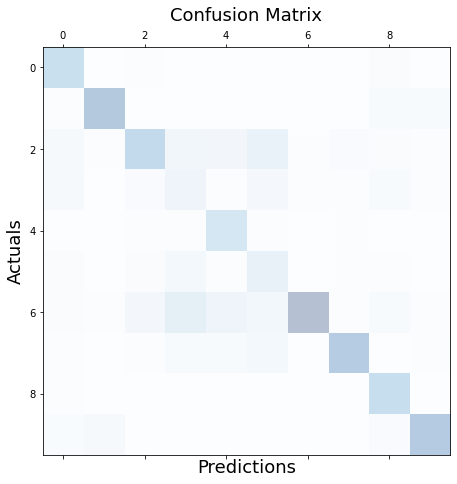

In [ ]:
predictions = model.predict(test_images)
all_predictions = np.array([])
for i in range(len(test_images)):
  prediction = np.array([np.argmax(predictions[i])])
  all_predictions = np.concatenate([all_predictions, prediction])
conf_mat = tf.math.confusion_matrix(all_predictions, test_labels)
print(conf_mat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
